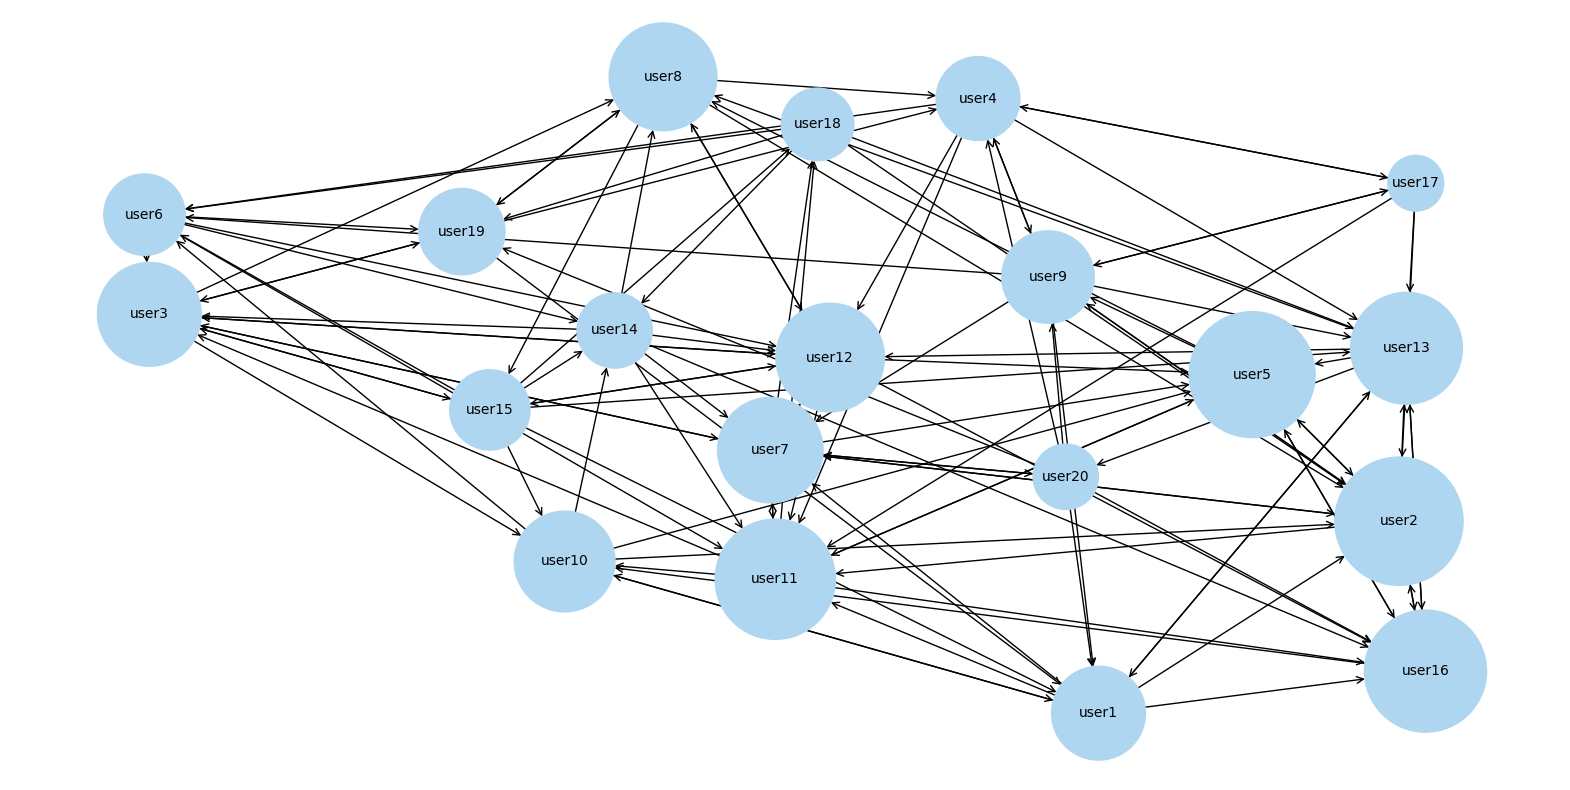

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import clickhouse_connect
import os
import pandas as pd
client = clickhouse_connect.get_client(host=os.getenv("CLICKHOUSE_HOST", 'localhost'), port=8123, username=os.getenv("CLICKHOUSE_USER", 'user'), password=os.getenv("CLICKHOUSE_PASSWORD",'password'))
dfs_stream = client.query_df_stream('SELECT user, follows from socialNetwork_followers;')
edges_df = pd.DataFrame()
with dfs_stream as dfs:
    edges_df = pd.concat([df for df in dfs], ignore_index=True)

# ─── 3. Build a DiGraph from the edges ───
G = nx.from_pandas_edgelist(
    edges_df,
    source="user",
    target="follows",
    create_using=nx.DiGraph()
)

dfs_stream = client.query_df_stream('SELECT user, rank from socialNetwork_userPopularity;')
sizes_df = pd.DataFrame()
with dfs_stream as dfs:
    sizes_df = pd.concat([df for df in dfs], ignore_index=True)

# ─── 4. Create a dict mapping node → size ───
size_dict = dict(zip(sizes_df["user"], sizes_df["rank"]))
# If a node is missing from size_dict, you can provide a default, e.g. 200
default_size = 0.0001

# ─── 5. Build a list of sizes in the same order as G.nodes() ───
node_sizes = [int(size_dict.get(node, default_size)*100000) for node in G.nodes()]

# ─── 6. Choose a layout and draw with node_size=node_sizes ───
pos = nx.spring_layout(G)

plt.figure(figsize=(20, 10))
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    arrows=True,
    node_size=node_sizes,  # use our custom sizes
    node_color="#AED6F1",
    arrowstyle="->",
    arrowsize=12,
    font_size=10
)
plt.axis("off")
plt.show()

In [7]:
node_sizes

[Decimal('0.007683525'),
 Decimal('0.006819872'),
 Decimal('0.006819872'),
 Decimal('0.006819872'),
 Decimal('0.006819872'),
 Decimal('0.007683525'),
 Decimal('0.006819872'),
 Decimal('0.006819872'),
 Decimal('0.007683525'),
 Decimal('0.006819872'),
 Decimal('0.006819872'),
 Decimal('0.007683525'),
 Decimal('0.006819872'),
 Decimal('0.006819872'),
 Decimal('0.006819872'),
 Decimal('0.006819872'),
 Decimal('0.006819872'),
 Decimal('0.007683525'),
 Decimal('0.006819872'),
 Decimal('0.006819872')]